선형회귀와 다르게 다항회귀에서는 곡선 그래프를 그리기 위해서 항을 추가한다.

현재 다루고 있는 데이터는 '농어 길이, 무게' 이므로 무게 = a * 길이² + b * 길이 + c 

> 훈련 세트에 *'길이를 제곱한 항'* 이 추가되어야 한다. 이를 위해 numpy를 사용한다.

In [6]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꾼다
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1565.34166092]


훈련 세트에 제곱항을 추가하여도, 타깃값은 그대로 사용
목표하는 값은 어떤 그래프를 훈련하든지 바꿀 필요가 없음.

In [9]:
print(lr.coef_, lr.intercept_)

[  1.0387514  -23.52503419] 144.71486632661453


coef_ : 가중치 
intercept_ : 절편

모델이 학습한 함수
* 무게 = 1.03 * 길이² -23.5 * 길이 + 144.71

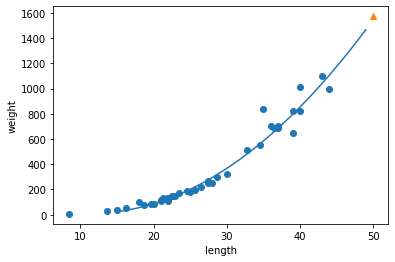

In [11]:
import matplotlib.pyplot as plt

# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열
point = np.arange(15,50)

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 15 ~ 49 2차 방정식 그래프 그리기
plt.plot(point, 1.03*point**2 - 23.5*point + 144.71)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [13]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9644629080805744
0.983848765368056


점수가 높아졌으나, 아직 과소적합이 남아있음(훈련세트>테스트 세트)